# Summary

let's draw some sheep

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, utils

from draw_strokes import draw_strokes, make_grid_svg

In [2]:
train = np.load("Sheep_Market/train.npy", encoding='latin1')
test = np.load("Sheep_Market/test.npy", encoding='latin1')
valid = np.load("Sheep_Market/valid.npy", encoding='latin1')

print("train: '{}', test: '{}', valid: '{}'".format(train.shape, test.shape, valid.shape))

train: '(7400,)', test: '(300,)', valid: '(300,)'


# 2.1 Rendering

Let's meet the sheep.

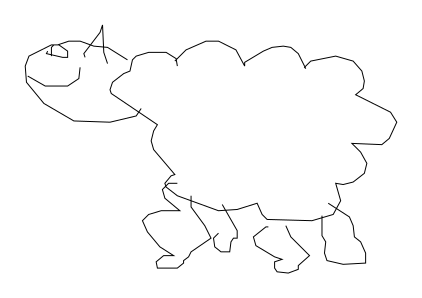

In [3]:
draw_strokes(train[0])

# Remaining code is in  "sheepgan.py"